In [1]:
import os
import sklearn.datasets
from sklearn.manifold import TSNE, Isomap
import pandas as pd
import numpy as np
import umap
import umap.plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
Axes3D
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [2]:
data_world = pd.read_csv("world_data/rawdata_world_3d.csv")
data_swiss_roll = pd.read_csv("swiss_roll_data/rawdata_swiss_roll_1000.csv")
data_circle = pd.read_csv("circle_data/rawdata_circle.csv", index_col=0)

print(f"world data shape: {data_world.shape}")
print(f"swiss roll data shape: {data_swiss_roll.shape}")
print(f"circle data shape: {data_circle.shape}")

y_world = data_world["y"]
y_swiss_roll = data_swiss_roll["y"]
y_circle = data_circle["y"]

data_world.drop(["y"], axis=1, inplace=True)
data_swiss_roll.drop(["y"], axis=1, inplace=True)
data_circle.drop(["y"], axis=1, inplace=True)

world data shape: (2527, 4)
swiss roll data shape: (1000, 4)
circle data shape: (300, 16130)


## Some helper functions

In [3]:
# create output/ folder to save some visualizations
if not os.path.exists('output'):
    os.makedirs('output')

In [4]:
## Function to plot embedding from `visualize_embbeding.py`
def plot_embedding(X, Y, title, plot_name, dimension):
    if dimension == 2:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
        legend = ax.legend(*scatter.legend_elements(),
                           bbox_to_anchor=(1.05, 1),
                           loc="best")
        ax.add_artist(legend)
        plt.title(f'2d {title}')
        plt.savefig(f'output/{plot_name}_2d.png', dpi=300)
    elif dimension == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(X[:, 0],
                             X[:, 1],
                             X[:, 2],
                             c=Y,
                             cmap=plt.cm.Spectral)
        legend = ax.legend(*scatter.legend_elements(),
                           bbox_to_anchor=(1.05, 1),
                           loc="best")
        ax.add_artist(legend)
        plt.title(f'3d {title}')
        plt.savefig(f'output/{plot_name}_3d.png', dpi=300)


def run_umap(data,
             n_neighbors=15,
             n_components=2,
             min_dist=0.1,
             metric="euclidean"):
    reducer = umap.UMAP(n_neighbors=n_neighbors,
                        n_components=n_components,
                        min_dist=min_dist,
                        metric=metric)
    mapper = reducer.fit(data)
    return mapper


# for testing parameter effects
def draw_umap(data,
              y,
              n_neighbors=15,
              min_dist=0.1,
              n_components=2,
              metric='euclidean',
              title=''):
    fit = umap.UMAP(n_neighbors=n_neighbors,
                    min_dist=min_dist,
                    n_components=n_components,
                    metric=metric)
    u = fit.fit_transform(data)
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:, 0], range(len(u)), c=y)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:, 0], u[:, 1], c=y)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:, 0], u[:, 1], u[:, 2], c=data, s=100)
    plt.title(title, fontsize=18)

## Experimenting with world data

In [5]:
print(f"\ndata:\n{data_world.head()}")
print(f"\nlabels:\n{y_world.head()}")


data:
        x_1       x_2       x_3
0  0.424143 -0.893815 -0.145596
1  0.119937 -0.975653  0.183620
2  0.471233 -0.881557 -0.028241
3  0.274765 -0.940287  0.200907
4  0.263778 -0.923872  0.277274

labels:
0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64


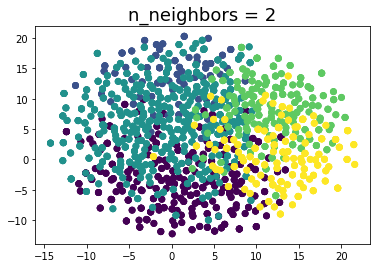

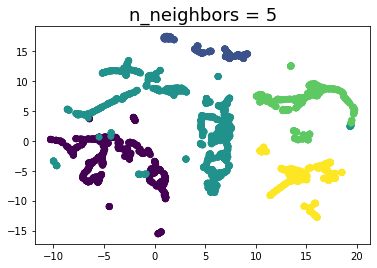

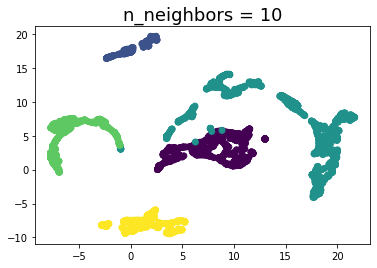

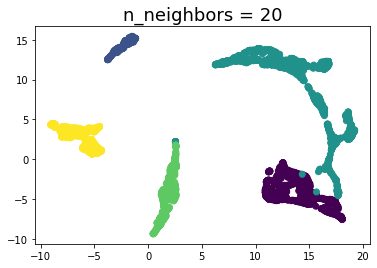

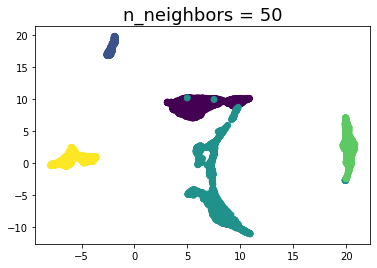

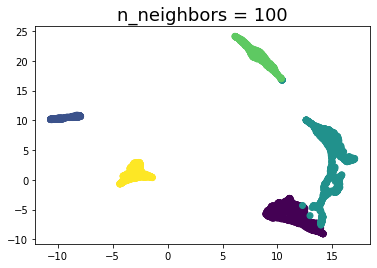

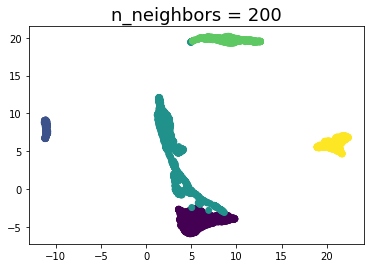

In [6]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(data=data_world,
              y=y_world,
              n_neighbors=n,
              title='n_neighbors = {}'.format(n))

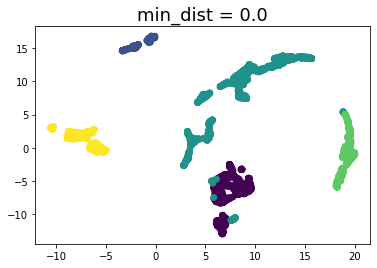

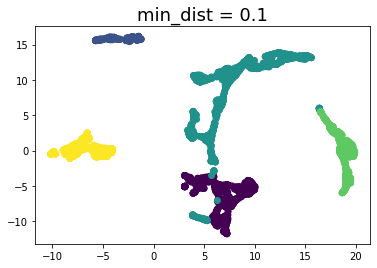

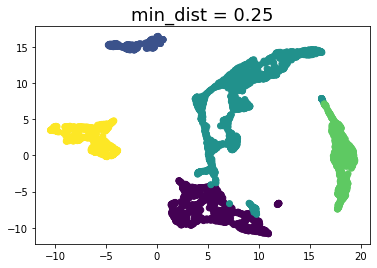

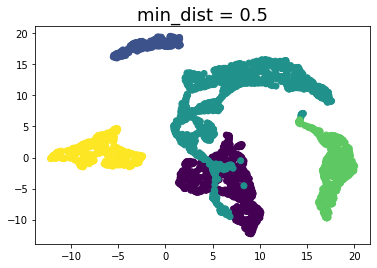

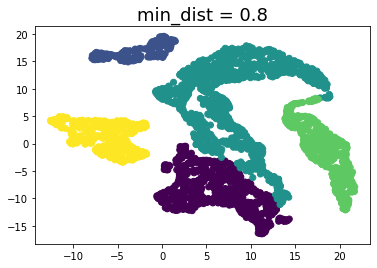

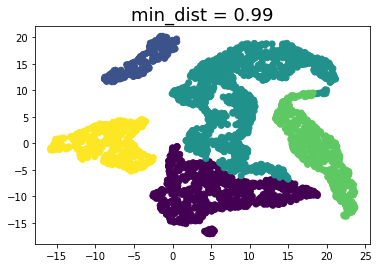

In [7]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(data=data_world,
              y=y_world,
              min_dist=d,
              title='min_dist = {}'.format(d))

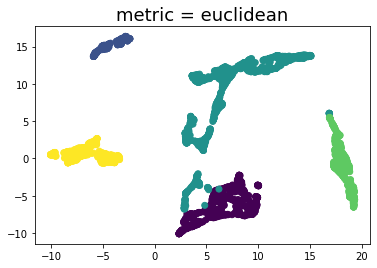

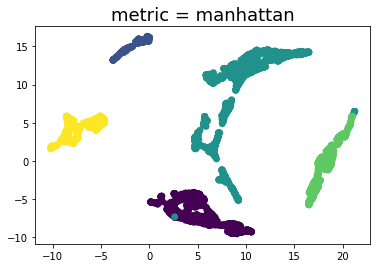

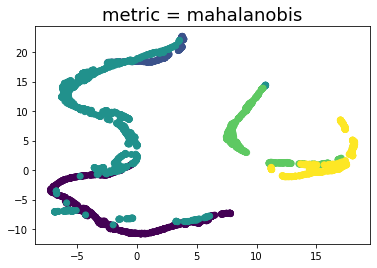

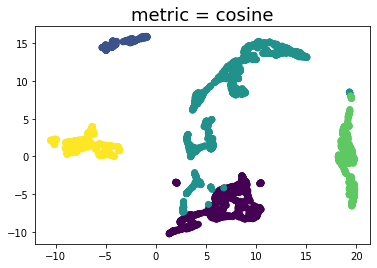

In [8]:
for m in ("euclidean", "manhattan", "mahalanobis", "cosine"):
    name = m if type(m) is str else m.__name__
    draw_umap(data=data_world,
              y=y_world,
              n_components=2,
              metric=m,
              title='metric = {}'.format(name))

In [9]:
mapper_world = run_umap(data=data_world, n_neighbors=20)

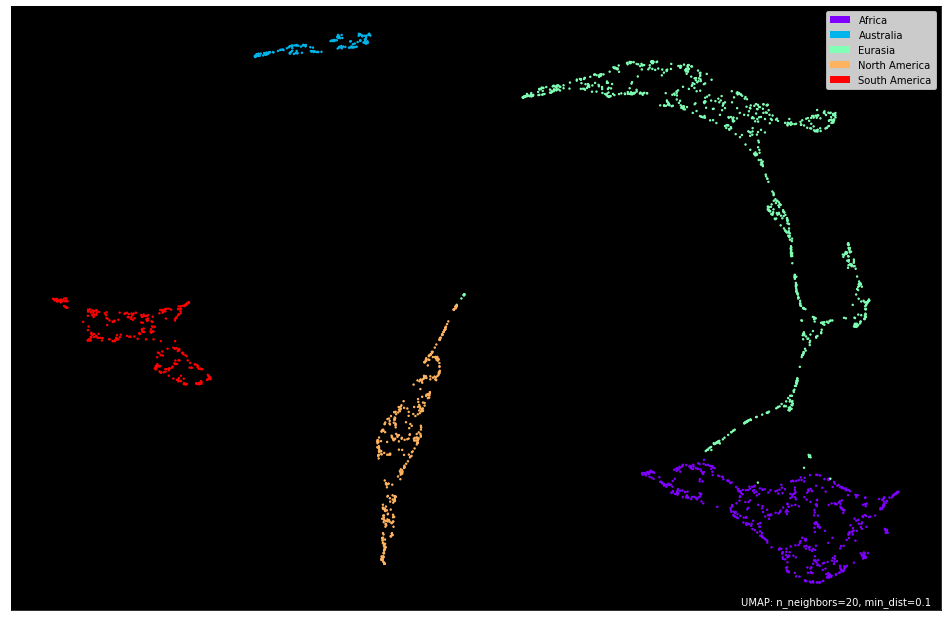

In [10]:
y_world = y_world.map({
    1: 'Africa',
    2: 'Australia',
    3: 'Eurasia',
    4: 'North America',
    5: 'South America'
})

umap.plot.points(mapper_world,
                 labels=y_world,
                 theme='fire',
                 width=1200,
                 height=800)

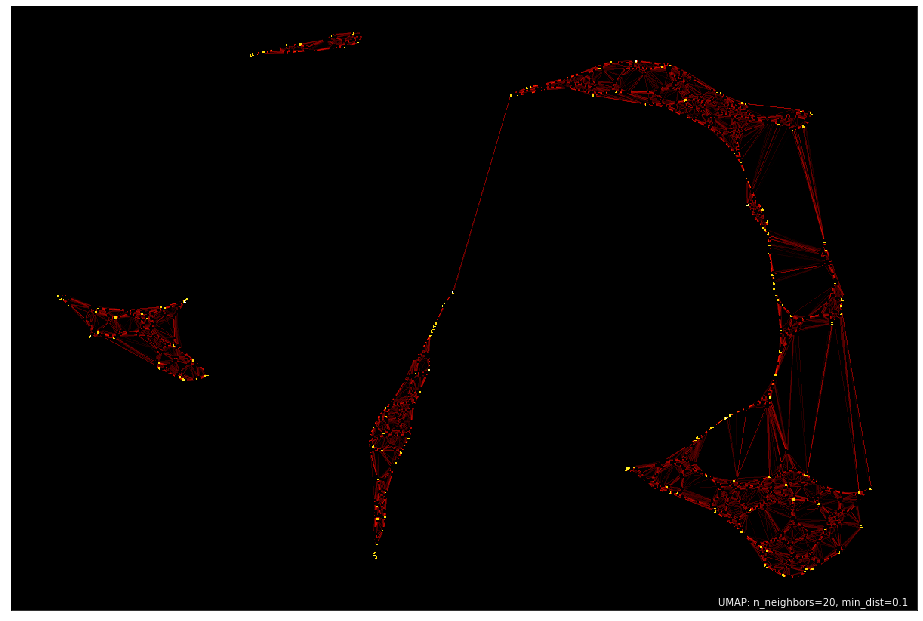

In [11]:
umap.plot.connectivity(mapper_world,
                       show_points=True,
                       theme="fire",
                       width=1200,
                       height=800)

In [12]:
hover_data_world = pd.DataFrame({
    'index': np.arange(len(y_world)),
    'label': y_world
})

p_world = umap.plot.interactive(mapper_world,
                                labels=y_world,
                                point_size=4,
                                hover_data=hover_data_world,
                                theme="fire",
                                width=800,
                                height=800)
umap.plot.show(p_world)

## Embedding other datasets using UMAP

### Swiss roll

In [13]:
mapper_swiss_roll = run_umap(data=data_swiss_roll,
                             n_neighbors=15,
                             min_dist=0.1)

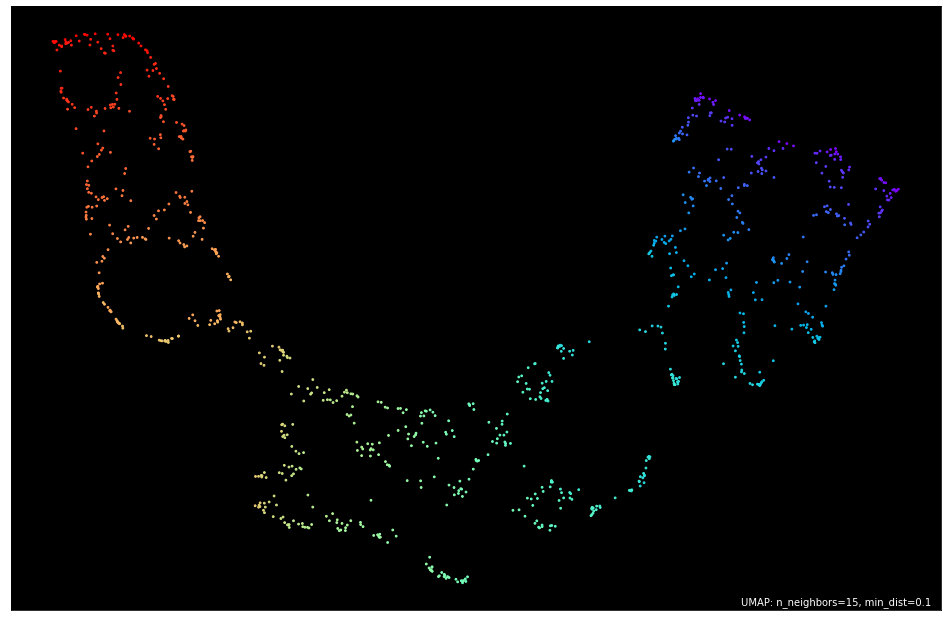

In [14]:
umap.plot.points(mapper_swiss_roll,
                 labels=y_swiss_roll,
                 theme='fire',
                 width=1200,
                 height=800,
                 show_legend=False)

In [15]:
hover_data_swiss_roll = pd.DataFrame({
    'index': np.arange(len(y_swiss_roll)),
    'label': y_swiss_roll
})

p_swiss_roll = umap.plot.interactive(mapper_swiss_roll,
                                     labels=y_swiss_roll,
                                     theme='fire',
                                     hover_data=hover_data_swiss_roll,
                                     width=800,
                                     height=800)
umap.plot.show(p_swiss_roll)

### Circle data

In [16]:
mapper_circle = run_umap(data=data_circle, n_neighbors=30, metric="euclidean")

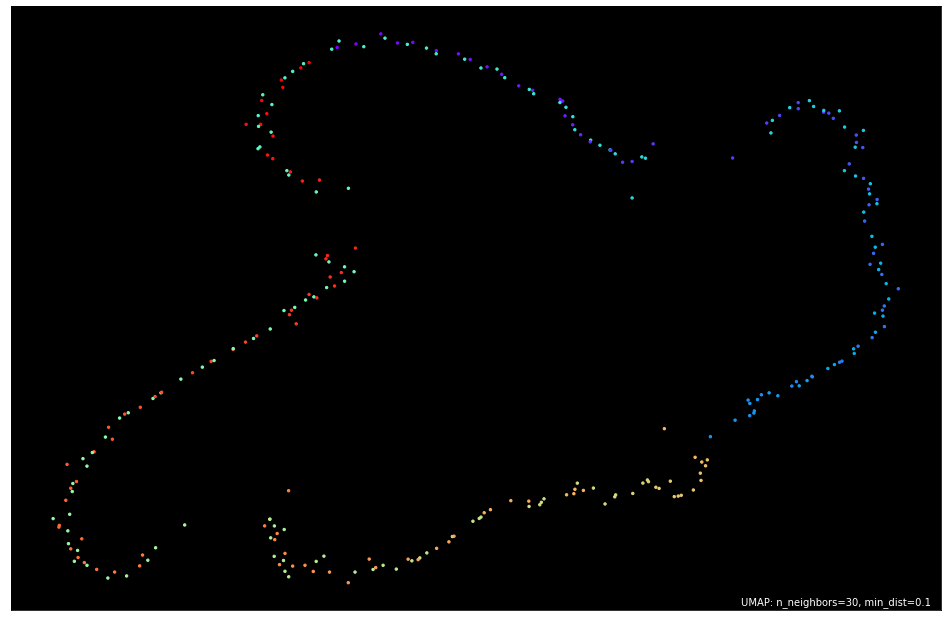

In [17]:
umap.plot.points(mapper_circle,
                 labels=y_circle,
                 theme='fire',
                 width=1200,
                 height=800,
                 show_legend=False)

In [18]:
hover_data_circle = pd.DataFrame({
    'index': np.arange(len(y_circle)),
    'label': y_circle
})
p_circle = umap.plot.interactive(mapper_circle,
                                 labels=y_circle,
                                 theme='fire',
                                 hover_data=hover_data_circle,
                                 width=800,
                                 height=800)
umap.plot.show(p_circle)

In [19]:
X_umap = umap.UMAP(n_neighbors=15, metric="euclidean",
                   n_components=3).fit_transform(data_circle)

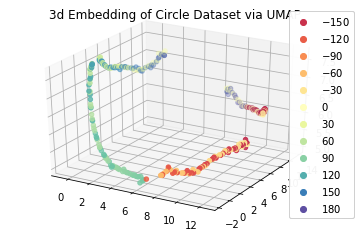

In [20]:
plot_embedding(X=X_umap,
               Y=y_circle,
               title="Embedding of Circle Dataset via UMAP",
               plot_name="umap_pendigits",
               dimension=3)

## Comparison to other Learning Methods

Using a dataset of handwritten digits. Each datapoint is a 8x8 image of a digit.

In [21]:
pendigits = sklearn.datasets.load_digits()
pendigits.data.shape

(1797, 64)

In [22]:
X_umap = umap.UMAP().fit_transform(pendigits.data)

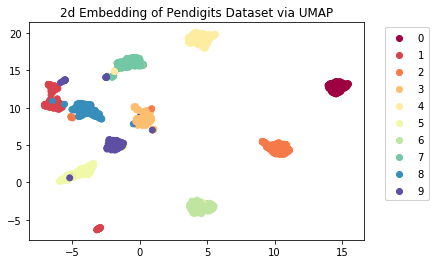

In [23]:
plot_embedding(X=X_umap,
               Y=pendigits.target,
               title="Embedding of Pendigits Dataset via UMAP",
               plot_name="umap_pendigits",
               dimension=2)

In [24]:
X_tsne = TSNE().fit_transform(pendigits.data)

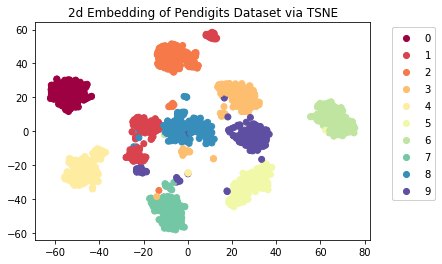

In [25]:
plot_embedding(X=X_tsne,
               Y=pendigits.target,
               title="Embedding of Pendigits Dataset via TSNE",
               plot_name="tsne_pendigits",
               dimension=2)

In [26]:
X_isomap = Isomap(n_neighbors=5).fit_transform(pendigits.data)

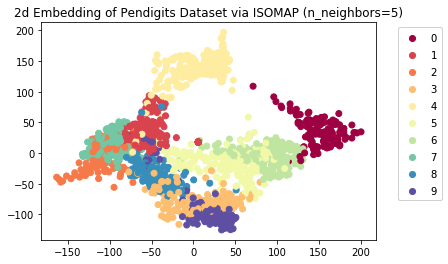

In [27]:
plot_embedding(
    X=X_isomap,
    Y=pendigits.target,
    title="Embedding of Pendigits Dataset via ISOMAP (n_neighbors=5)",
    plot_name="isomap_pendigits",
    dimension=2)